# A closer look into the Spanish railway passenger transportation pricing
******

## Introduction

As someone who lives and works in a Spanish city 400km away from home, I have found that the most convenient way to travel back and forth is to resort to the train. As a frequent user I have grown baffled of the pricing pattern upon buying the tickets, moving sometimes along the same levels, while others out of the most common levels.

So this doubt spurred me to formulate and investigate the following questions:

**“Do train ticket prices really change over the days”?**

And if so, 

**“Is there an optimal moment to buy them?”**

## Context / data

In this project, only Renfe’s long distances routes were considered. 

The dataset is originally sourced from a Renfe scrapping procedure carried over by thegurus.tech, where prices for the sampled routes departing trains where checked several times on loop each day. 

In particular, the trains whose prices were checked, range about 3 months, from April 12th 2019 to July 7th 2019.

https://thegurus.tech/posts/2019/05/renfe-idea/

## Data wrangling

After spending some time getting to know the data (more details can be found in "Getting_to_know_data_1.ipynb" and "Getting_to_know_data_2.ipynb"), next step is to clean the raw and transform it in a way that is prepared for analysis, therefore prepared to cast light into the main questions.

Developing this a little bit more, cleaning and transformation tasks range from creating new columns such as routes, departure date, departure time, identifiers for a particular train departing in a given a day and in a given time, or days to departure; to changing format to columns to be able to do calculations and further transformations on them, through reducing categories for some categorical variables such as train type or ticket class, dropping not needed columns, deciding what to do with invalid rows (with NaN values).

All details of this section can be found in "Data_wrangling_1.ipynb" and "Data_wrangling_2.ipynb"

Additionally, dataframes were created not only for the data cleant, but broken down ones for all the routes.

"More details in Brewing_raw_data.ipynb"

## Data analysis and visualizations

#### Importing libraries

In [5]:
import os
import pandas as pd
import numpy as np
import datetime
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
renfe = pd.read_csv("../Data/renfe_clean_2.csv")

In [4]:
renfe.head(3)

,origin,destination,departure_date,departure_time,price,price_check_date,price_check_time,train_type,route,abb_departure_date,...,semi_identifier,departure_weekday,price_check_weekday,days_to_departure,train_category,ticket_class_category,fare_category,price_check_time_window,departure_time_window,departure_day
0,MAD,SEV,2019-05-29,06:20:00,38.55,2019-04-19,05:31:43,AV City,MAD-SEV,29-05,...,29-05_06:20,Wednesday,Friday,40,Long_distance,Economy,Fixed,Deep_night,Morning,weekday
1,MAD,SEV,2019-05-29,07:00:00,53.40,2019-04-19,05:31:43,AVE,MAD-SEV,29-05,...,29-05_07:00,Wednesday,Friday,40,High_speed,Economy,Fixed,Deep_night,Morning,weekday
2,MAD,SEV,2019-05-29,07:30:00,47.30,2019-04-19,05:31:43,AVE,MAD-SEV,29-05,...,29-05_07:30,Wednesday,Friday,40,High_speed,Economy,Fixed,Deep_night,Morning,weekday


#### Setting the style for all notebook plots

In [7]:
from matplotlib.pyplot import style
plt.style.use('ggplot')

### Boxplots. Price vs X (trip / train characteristics)

#### Once the data is clean, the idea is to get to know more about the train ticket price by plotting it against some trip/train characteristics

### Price per route

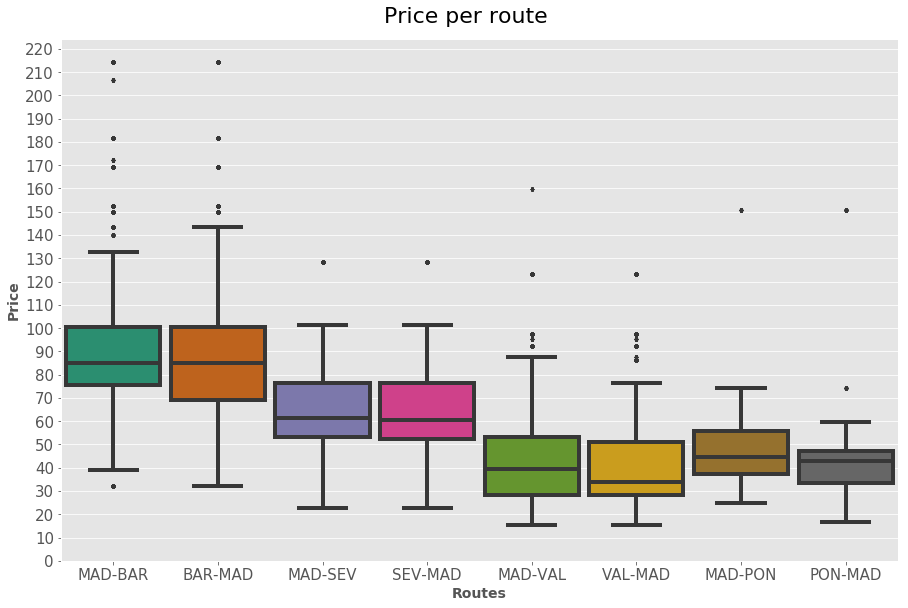

In [9]:
index=["MAD-BAR", "BAR-MAD", "MAD-SEV", "SEV-MAD", "MAD-VAL", "VAL-MAD", "MAD-PON", "PON-MAD"]

fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle("Price per route", fontsize=22)
fig.subplots_adjust(top=0.93)

ax=sns.boxplot(x="route", y="price", data=renfe, palette="Dark2", fliersize=3, width=0.9, linewidth=4,
            order=index)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel("Price", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Routes",fontsize = 14, fontweight = "bold")
ax.set_yticks(np.arange(0, 230, step=10))

plt.savefig("../Figures/Boxplots/price_per_route", dpi=300)
plt.show()

This plot above allows us to know more about the price distribution based on the different routes available in our dataset, so in particular, Madrid-Barcelona round route accounts for the higher prices, both in terms of most common ones, as it can be seen in the coloured box (IQR), and in terms of outliers. Median price is 85€, and the range of prices is the widest as compared with the other routes. Maximum ticket price reached as far as 215€.

Then Madrid-Sevilla round route follows with lower average prices, and is followed by Madrid-Pontevedra and Madrid-Valencia round routes which have even lower prices than Sevilla leg route but wider range.

It stands out that the lower prices are found in the Valencia-Madrid route, in fact 50% of them are below 34€ on average (note that long distance "regional" trains have not been excluded from the study, so they move the prices down since they are the cheapest ones).





### Price per train type

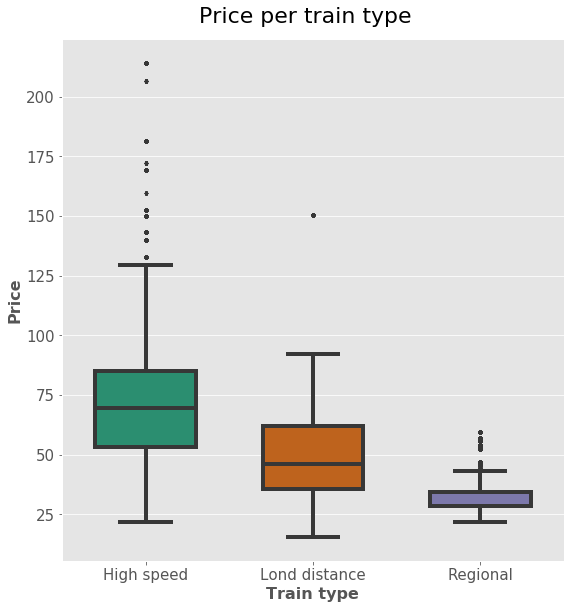

In [95]:
index=["High_speed", "Long_distance", "Regional"]

fig, ax = plt.subplots(figsize=(9,9))
fig.suptitle("Price per train type", fontsize=22)
fig.subplots_adjust(top=0.93)
ax=sns.boxplot(x="train_category", y="price", data=renfe, palette="Dark2",
               fliersize=3, width=0.6, linewidth=4, order=index)

ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel("Price", fontsize = 16, fontweight = "bold")
ax.set_xlabel("Train type",fontsize = 16, fontweight = "bold")

labels = [item for item in ax.get_xticklabels()]
labels[0] = "High speed"
labels[1] = "Lond distance"

ax.set_xticklabels(labels)

plt.savefig("../Figures/Boxplots/prices per train type", dpi=300)
plt.show()

We can clearly see that high speed trains like AVE, are the most expensive ones, in particular, in the time span of the study, the range goes from 23€ of the cheapest ticket to 215€ of the most expensive one. 50% of its ticket prices were offered to the general public for less than 70€. It is followed by the long distance trains whose median is 47€ and long distance regional ones whose median is 35€

### Price per train type and ticket class

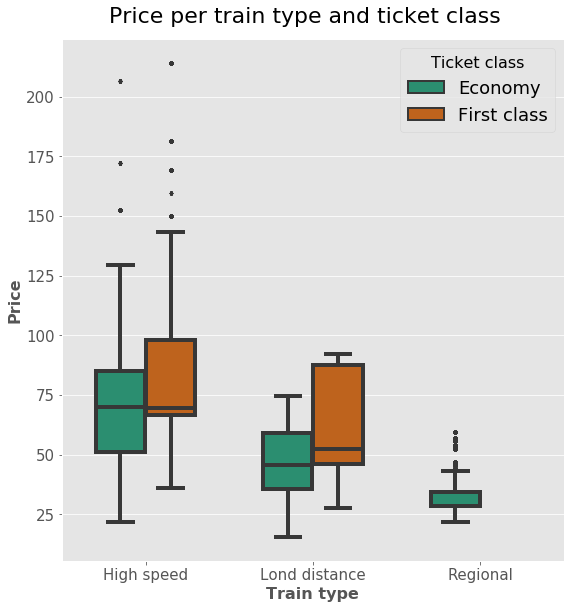

In [96]:
index=["High_speed", "Long_distance", "Regional"]

fig, ax = plt.subplots(figsize=(9,9))
fig.suptitle("Price per train type and ticket class", fontsize=22)
fig.subplots_adjust(top=0.93)
ax=sns.boxplot(x="train_category", y="price", hue="ticket_class_category", data=renfe, palette="Dark2",
               fliersize=3, width=0.6, linewidth=4, order=index)

ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel("Price", fontsize = 16, fontweight = "bold")
ax.set_xlabel("Train type",fontsize = 16, fontweight = "bold")

labels = [item for item in ax.get_xticklabels()]
labels[0] = "High speed"
labels[1] = "Lond distance"

ax.set_xticklabels(labels)

handles,labels = ax.get_legend_handles_labels()

chg = ax.legend(handles,labels, prop={'size': 18}, fancybox=True, title="Ticket class",
          title_fontsize=16)

chg.get_texts()[1].set_text('First class')

plt.savefig("../Figures/Boxplots/prices per train type and ticket class", dpi=300)
plt.show()

When we break down previous figure by ticket class, we can see the difference between economy and first class. Central tendency values are quite similar between ticket classes, but if we look at the whole interquartile range (IQR) covering from 25% to 75% of the sorted prices range, the upper boundary of the box of first class is greater than the upper boundary of the one for economy class in a noticeable way.

### Price per day of week departure

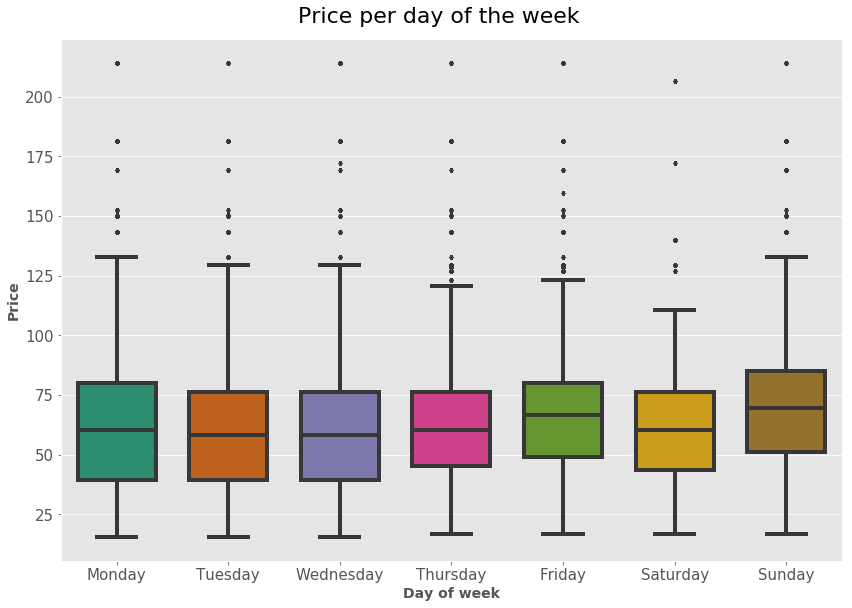

In [113]:
index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(14,9))
fig.suptitle("Price per day of the week", fontsize=22)
fig.subplots_adjust(top=0.93)
ax=sns.boxplot(x="departure_weekday", y="price", data=renfe, palette="Dark2", fliersize=3, width=0.7, linewidth=4,
            order=index)

ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel("Price", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Day of week",fontsize = 14, fontweight = "bold")

plt.savefig("../Figures/Boxplots/price per day of the week", dpi=300)
plt.show()

Above boxplot shows that prices distribute in a similar way among the different departure week days. Trains departing on Fridays and sundays are the ones with higher prices on average, followed by the ones departing on monday.

### Price per day of week departure and train class

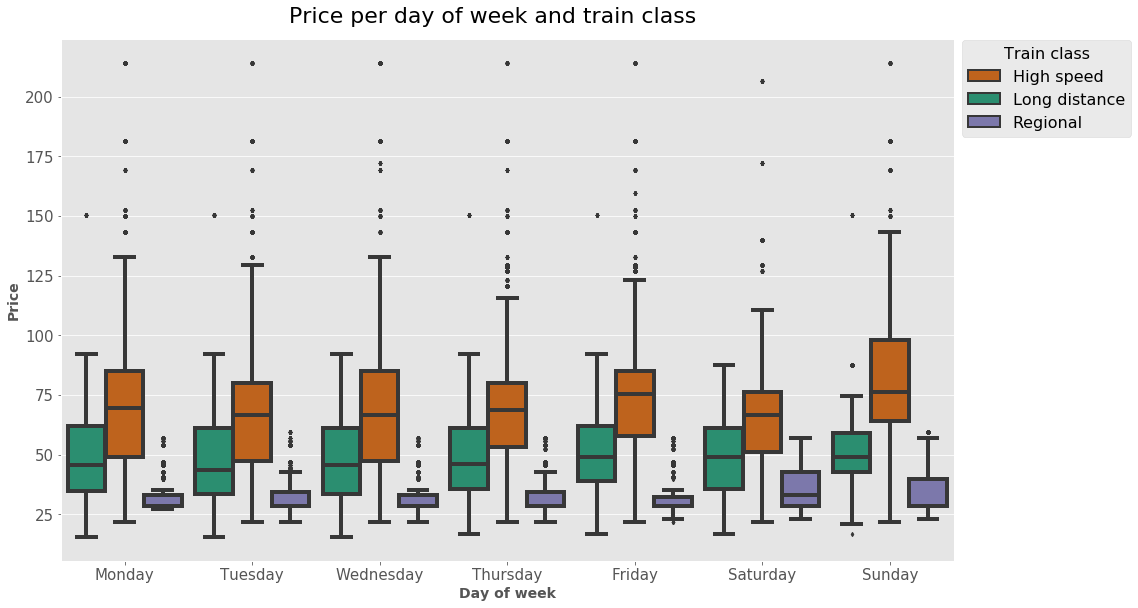

In [12]:
index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(16,9))
fig.suptitle("Price per day of week and train class", fontsize=22)
fig.subplots_adjust(top=0.93)
ax=sns.boxplot(x="departure_weekday", y="price", hue="train_category", data=renfe, palette="Dark2",
               fliersize=3, width=0.9, linewidth=4, order=index)

ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel("Price", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Day of week",fontsize = 14, fontweight = "bold")

handles,labels = ax.get_legend_handles_labels()

handles = [handles[1], handles[0], handles[2]]
labels = [labels[1], labels[0], labels[2]]

chg = ax.legend(handles,labels, loc="upper left", prop={'size': 16}, fancybox=True, title="Train class",
          title_fontsize=16, bbox_to_anchor=(1, 1.014))

chg.get_texts()[0].set_text('High speed')
chg.get_texts()[1].set_text('Long distance')

plt.savefig("../Figures/Boxplots/price per day of week and train class", dpi=300)
plt.show()

In the boxplot above, the differential reading as compared to the previous one is that the price spread between high speed trains and long distance for the most expensive days, that is, friday and sunday, gets wider than for the rest of the days

### Price per departure time window

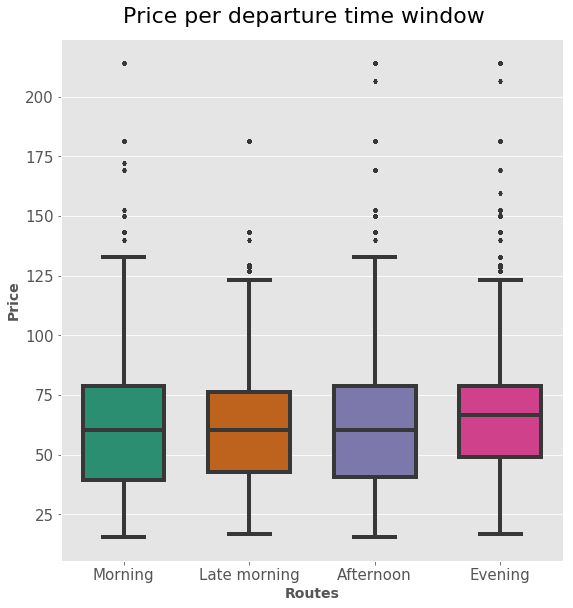

In [112]:
index=["Morning", "Late_morning", "Afternoon", "Evening"]

fig, ax = plt.subplots(figsize=(9,9))
fig.suptitle("Price per departure time window", fontsize=22)
fig.subplots_adjust(top=0.93)

ax=sns.boxplot(x="departure_time_window", y="price", data=renfe, palette="Dark2", fliersize=3, 
               width=0.65, linewidth=4, order=index)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel("Price", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Routes",fontsize = 14, fontweight = "bold")

labels = [item for item in ax.get_xticklabels()]
labels[1] = "Late morning"

ax.set_xticklabels(labels)

plt.savefig("../Figures/Boxplots/price per departure time window", dpi=300)
plt.show()

The price distribution among different departure time windows is very similar. The only insight I would take out of it would be that evening departing trains are in general less cheap than in other time windows, this is, probably due to a higher demand, the prices rise up more quickly, hence, the web scraping tool captures proportionally less checks with lower prices. 

### Line plots. Price grouped by days to departure

In [10]:
figure_2 = renfe.groupby(["days_to_departure"])["price"].mean()

In [11]:
figure_2 = figure_2.to_frame()

In [12]:
figure_2 = figure_2.rename(columns={"price": "average_price"})

In [13]:
figure_2.to_csv("../Data/renfe_figure_2.csv")

In [14]:
figure_2 = pd.read_csv("../Data/renfe_figure_2.csv")

In [15]:
figure_2.head()

,days_to_departure,average_price
0,0,81.176099
1,1,78.128749
2,2,75.611743
3,3,74.464326
4,4,73.229819


### Price vs days to departure. All routes together

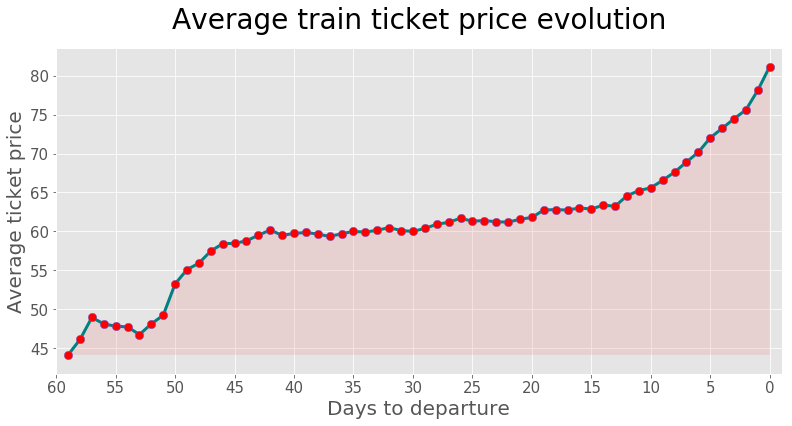

In [214]:
plt.figure(figsize=(13,6))
plt.plot(figure_2["days_to_departure"], figure_2["average_price"],'C3', zorder=1, lw=3, color="teal")
plt.scatter(figure_2["days_to_departure"], figure_2["average_price"], s=70, zorder=2, color="red", edgecolor="slateblue")
plt.fill_between(figure_2["days_to_departure"], figure_2["average_price"].min(), figure_2["average_price"], facecolor='lightcoral', alpha=0.2)

plt.xlim(60, -1)
plt.xlabel("Days to departure", fontsize = 20, fontweight = 450)
plt.ylabel("Average ticket price", fontsize = 20, fontweight = 450)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xticks(np.arange(0, 61, step=5))

plt.title("Average train ticket price evolution", fontsize = 28, y=1.04)

plt.savefig("../Figures/Average train ticket price evolution", dpi=300)
plt.show()


There are few interesting things to comment of this graph. On one hand, it answers the main questions. 

1) We can see that the price indeed changes over the days, not only that, we can also see that there is clearly an aggregated trend where the price goes up as the departure day gets closer.

2) Once we accept that there are indeed relevant variations, is there an optimal moment to buy the tickets? Well, from the aggregated graph, we can see that the optimal moment to buy is as soon as the tickets are made available for sale, and in any case, between 50 to 60 days.

On the other hand, it allows us to identify 3 mains stages. First, between 42 to 60 days before departure, we can find the lower range of prices, then a period between 42 and 13 days before departure where the variation in prices is very low, around 6%-7% altogether. And lastly there is the stage where the ticket price increases by the day.

### Breaking down within all the dataset routes. Each route was divided into different dataframes for manipulation ease so we are calling them now

In [4]:
renfe_MAD_BAR = pd.read_csv("../Data/renfe_MAD_BAR.csv")
renfe_MAD_PON = pd.read_csv("../Data/renfe_MAD_PON.csv")
renfe_MAD_SEV = pd.read_csv("../Data/renfe_MAD_SEV.csv")
renfe_MAD_VAL = pd.read_csv("../Data/renfe_MAD_VAL.csv")
renfe_BAR_MAD = pd.read_csv("../Data/renfe_BAR_MAD.csv")
renfe_PON_MAD = pd.read_csv("../Data/renfe_PON_MAD.csv")
renfe_SEV_MAD = pd.read_csv("../Data/renfe_SEV_MAD.csv")
renfe_VAL_MAD = pd.read_csv("../Data/renfe_VAL_MAD.csv")

In [5]:
renfe_MAD_BAR.head(3)

,origin,destination,departure_date,departure_time,price,price_check_date,price_check_time,train_type,route,abb_departure_date,...,semi_identifier,departure_weekday,price_check_weekday,days_to_departure,train_category,ticket_class_category,fare_category,price_check_time_window,departure_time_window,departure_day
0,MAD,BAR,2019-04-27,06:20:00,86.8,2019-04-19,06:00:47,AVE,MAD-BAR,27-04,...,27-04_06:20,Saturday,Friday,8,High_speed,First_class,Fixed,Morning,Morning,weekend
1,MAD,BAR,2019-04-27,07:30:00,75.4,2019-04-19,06:00:47,AVE,MAD-BAR,27-04,...,27-04_07:30,Saturday,Friday,8,High_speed,Economy,Fixed,Morning,Morning,weekend
2,MAD,BAR,2019-04-27,08:30:00,107.7,2019-04-19,06:00:47,AVE,MAD-BAR,27-04,...,27-04_08:30,Saturday,Friday,8,High_speed,Economy,Flexible,Morning,Morning,weekend


In [6]:
figure_3_data = renfe_MAD_BAR.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_4_data = renfe_MAD_PON.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_5_data = renfe_MAD_SEV.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_6_data = renfe_MAD_VAL.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_7_data = renfe_BAR_MAD.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_8_data = renfe_PON_MAD.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_9_data = renfe_SEV_MAD.groupby(["days_to_departure"])["price"].mean().to_frame()
figure_10_data = renfe_VAL_MAD.groupby(["days_to_departure"])["price"].mean().to_frame()

In [7]:
figure_3_data.to_csv("../Data/renfe_figure_3.csv")
figure_4_data.to_csv("../Data/renfe_figure_4.csv")
figure_5_data.to_csv("../Data/renfe_figure_5.csv")
figure_6_data.to_csv("../Data/renfe_figure_6.csv")
figure_7_data.to_csv("../Data/renfe_figure_7.csv")
figure_8_data.to_csv("../Data/renfe_figure_8.csv")
figure_9_data.to_csv("../Data/renfe_figure_9.csv")
figure_10_data.to_csv("../Data/renfe_figure_10.csv")


In [8]:
figure_3 = pd.read_csv("../Data/renfe_figure_3.csv")
figure_4 = pd.read_csv("../Data/renfe_figure_4.csv")
figure_5 = pd.read_csv("../Data/renfe_figure_5.csv")
figure_6 = pd.read_csv("../Data/renfe_figure_6.csv")
figure_7 = pd.read_csv("../Data/renfe_figure_7.csv")
figure_8 = pd.read_csv("../Data/renfe_figure_8.csv")
figure_9 = pd.read_csv("../Data/renfe_figure_9.csv")
figure_10 = pd.read_csv("../Data/renfe_figure_10.csv")


### Price ticket evolution in a high demand route. E.g Madrid-Barcelona / Barcelona-Madrid

/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


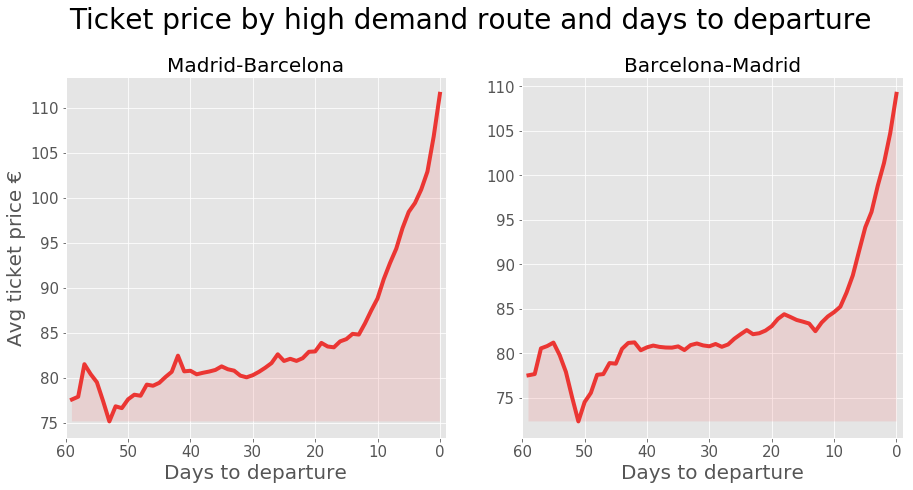

In [10]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,7))
fig.subplots_adjust(hspace=0.24, top=0.84)
fig.suptitle("Ticket price by high demand route and days to departure", fontsize=28)
c1 = "#EB3633"


ax1.plot(figure_3["days_to_departure"], figure_3["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax1.set_xlim(60, -1)
ax1.set_ylabel("Avg ticket price €", fontsize = 20)
ax1.set_xlabel("Days to departure",fontsize = 20)
ax1.set_title('Madrid-Barcelona', size=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.fill_between(figure_3["days_to_departure"], figure_3["price"].min(), figure_3["price"], facecolor='lightcoral', alpha=0.2)

ax2.plot(figure_7["days_to_departure"], figure_7["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax2.set_xlim(60, -1)
ax2.set_xlabel("Days to departure",fontsize = 20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.set_title('Barcelona-Madrid', size=20)
ax2.fill_between(figure_7["days_to_departure"], figure_7["price"].min(), figure_7["price"], facecolor='lightcoral', alpha=0.2)

plt.savefig("../Figures/train ticket price evolution per high demand route", dpi=300)

Madrid-Barcelona round route has been selected as an example of a high demanded one. It has a similar pattern that the one we observed taking into account all available routes together. We see a drop in prices after ticket has been released for sale, close to 50 days before departure. Again, we can identify the 3 stages, first between 40 to 60 days before departure, lower range of prices, then a period between 40 and 12 days before departure where the variation in prices is very low, around 6%-7%. And last there is the stage where the ticket price increases by the day.

### Price ticket evolution in a non-high demand route. E.g Madrid-Ponferrada / Ponferrada-Madrid

/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


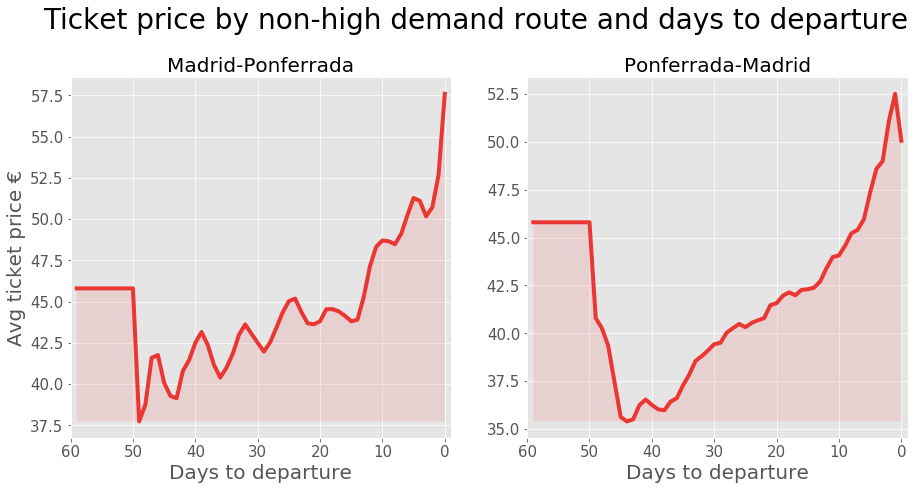

In [254]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,7))
fig.subplots_adjust(hspace=0.24, top=0.84)
fig.suptitle("Ticket price by non-high demand route and days to departure", fontsize=28)
c1 = "#EB3633"

ax1.plot(figure_4["days_to_departure"], figure_4["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax1.set_xlim(60, -1)
ax1.set_ylabel("Avg ticket price €", fontsize = 20)
ax1.set_xlabel("Days to departure",fontsize = 20)
ax1.set_title('Madrid-Ponferrada', size=20)
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
ax1.fill_between(figure_4["days_to_departure"], figure_4["price"].min(), figure_4["price"], facecolor='lightcoral', alpha=0.2)

ax2.plot(figure_8["days_to_departure"], figure_8["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax2.set_xlim(60, -1)
ax2.set_xlabel("Days to departure",fontsize = 20)
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.set_title('Ponferrada-Madrid', size=20)
ax2.fill_between(figure_8["days_to_departure"], figure_8["price"].min(), figure_8["price"], facecolor='lightcoral', alpha=0.2)

plt.savefig("../Figures/train ticket price evolution per non-high demand route", dpi=300)

This time, Renfe sets an initial price, but since demand is not met for that price, it starts to dip until it touches the lowest point between 40-50 days before departure. Then the proce evolution is much more volatile, and it continuously rises and falls as the departure day approaches, but always following an increasing trend. 

The intermediate stage that we saw in previous plots, where the price pretty much stays constant for almost a month, it is not quite repeated here. 

Last point I would highlight is that the price variation range is much lower than for a high demand route.

### Canvas of all dataset routes price evolution 

/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/home/salva/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/home/salva/anaconda3/lib/py

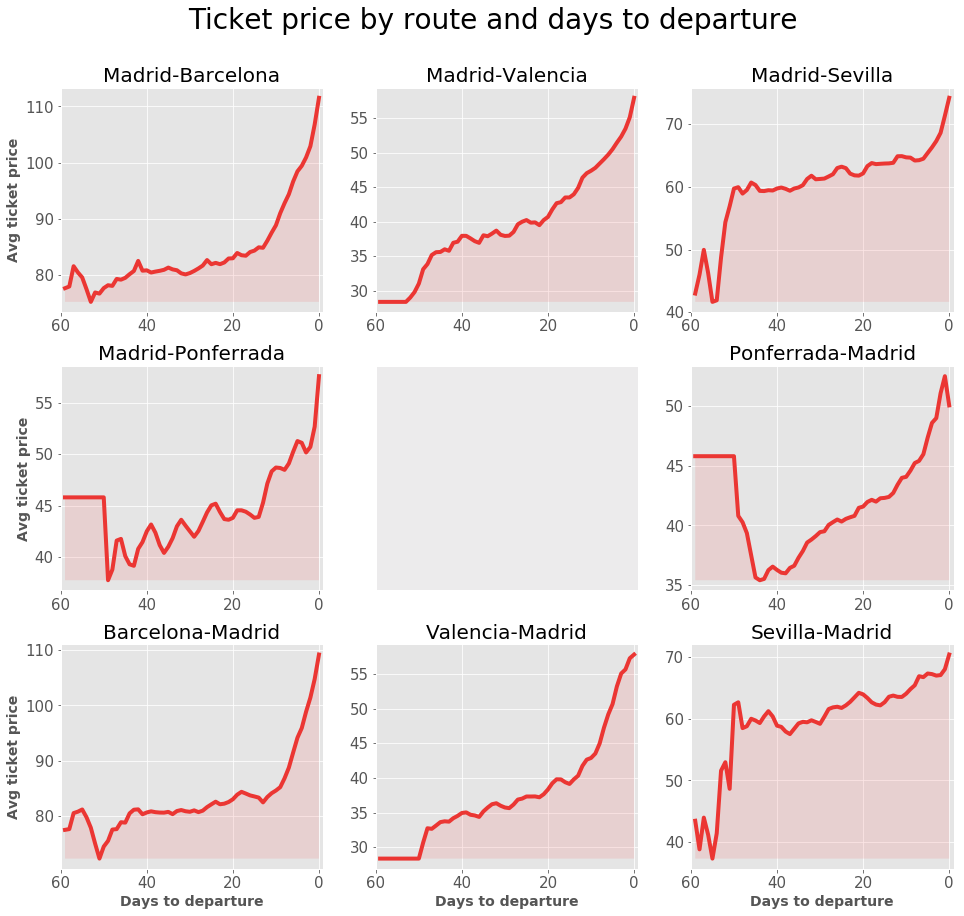

In [23]:
c0 = "#ECEBEC"  
c2 = "#6AD4F9"  
c4 = "#0454FE" 
c6 = "#9F83FC"
c8 = "#365560"
c1 = "#EB3633"

fig, ax = plt.subplots(3,3, figsize=(16,14))
fig.subplots_adjust(hspace=0.24, top=0.9)
fig.suptitle("Ticket price by route and days to departure", fontsize=28)

ax[0,0].plot(figure_3["days_to_departure"], figure_3["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[0,0].set_ylabel("Avg ticket price", fontsize = 14, fontweight = "bold")
ax[0,0].set_title('Madrid-Barcelona', size=20)
ax[0,0].set_xlim(60, -1)
ax[0,0].tick_params(axis="x", labelsize=15)
ax[0,0].tick_params(axis="y", labelsize=15)
ax[0,0].fill_between(figure_3["days_to_departure"], figure_3["price"].min(), figure_3["price"], facecolor='lightcoral', alpha=0.2)


ax[0,1].plot(figure_6["days_to_departure"], figure_6["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[0,1].set_title('Madrid-Valencia', size=20)
ax[0,1].set_xlim(60, -1)
ax[0,1].tick_params(axis="x", labelsize=15)
ax[0,1].tick_params(axis="y", labelsize=15)
ax[0,1].fill_between(figure_6["days_to_departure"], figure_6["price"].min(), figure_6["price"], facecolor='lightcoral', alpha=0.2)


ax[0,2].plot(figure_5["days_to_departure"], figure_5["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[0,2].set_title('Madrid-Sevilla', size=20)
ax[0,2].set_xlim(60, -1)
ax[0,2].tick_params(axis="x", labelsize=15)
ax[0,2].tick_params(axis="y", labelsize=15)
ax[0,2].fill_between(figure_5["days_to_departure"], figure_5["price"].min(), figure_5["price"], facecolor='lightcoral', alpha=0.2)


ax[1,0].plot(figure_4["days_to_departure"], figure_4["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[1,0].set_ylabel("Avg ticket price", fontsize = 14, fontweight = "bold")
ax[1,0].set_title('Madrid-Ponferrada', size=20)
ax[1,0].set_xlim(60, -1)
ax[1,0].tick_params(axis="x", labelsize=15)
ax[1,0].tick_params(axis="y", labelsize=15)
ax[1,0].fill_between(figure_4["days_to_departure"], figure_4["price"].min(), figure_4["price"], facecolor='lightcoral', alpha=0.2)


ax[1,1].plot(figure_2["days_to_departure"], figure_2["average_price"],'C3', zorder=1, lw=3, color=c0, linewidth="300")
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])


ax[1,2].plot(figure_8["days_to_departure"], figure_8["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[1,2].set_title('Ponferrada-Madrid', size=20)
ax[1,2].set_xlim(60, -1)
ax[1,2].tick_params(axis="x", labelsize=15)
ax[1,2].tick_params(axis="y", labelsize=15)
ax[1,2].fill_between(figure_8["days_to_departure"], figure_8["price"].min(), figure_8["price"], facecolor='lightcoral', alpha=0.2)


ax[2,0].plot(figure_7["days_to_departure"], figure_7["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[2,0].set_title('Barcelona-Madrid', size=20)
ax[2,0].set_xlabel("Days to departure", fontsize = 14, fontweight = "bold")
ax[2,0].set_ylabel("Avg ticket price", fontsize = 14, fontweight = "bold")
ax[2,0].set_xlim(60, -1)
ax[2,0].tick_params(axis="x", labelsize=15)
ax[2,0].tick_params(axis="y", labelsize=15)
ax[2,0].fill_between(figure_7["days_to_departure"], figure_7["price"].min(), figure_7["price"], facecolor='lightcoral', alpha=0.2)


ax[2,1].plot(figure_10["days_to_departure"], figure_10["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[2,1].set_title('Valencia-Madrid', size=20)
ax[2,1].set_xlabel("Days to departure",fontsize = 14, fontweight = "bold")
ax[2,1].set_xlim(60, -1)
ax[2,1].tick_params(axis="x", labelsize=15)
ax[2,1].tick_params(axis="y", labelsize=15)
ax[2,1].fill_between(figure_10["days_to_departure"], figure_10["price"].min(), figure_10["price"], facecolor='lightcoral', alpha=0.2)


ax[2,2].plot(figure_9["days_to_departure"], figure_9["price"],'C3', zorder=1, lw=3, color=c1, linewidth="4")
ax[2,2].set_title('Sevilla-Madrid', size=20)
ax[2,2].set_xlabel("Days to departure", fontsize = 14, fontweight = "bold")
ax[2,2].set_xlim(60, -1)
ax[2,2].tick_params(axis="x", labelsize=15)
ax[2,2].tick_params(axis="y", labelsize=15)
ax[2,2].fill_between(figure_9["days_to_departure"], figure_9["price"].min(), figure_9["price"], facecolor='lightcoral', alpha=0.2)


plt.savefig("../Figures/train ticket price evolution per route", dpi=300)
plt.show()

### Combined line plots. Breaking down the price evolution per further characteristics.

### Day of the week effect

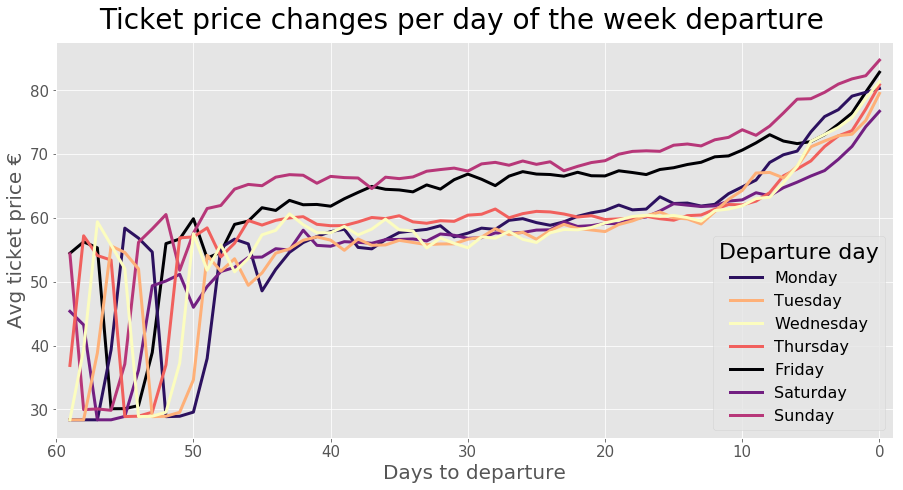

In [109]:
fig, ax = plt.subplots(figsize=(15,7))
fig.subplots_adjust(hspace=0.24, top=0.91)
fig.suptitle("Ticket price changes per day of the week departure", fontsize=28)

renfe.groupby(['days_to_departure','departure_weekday']).mean()['price'].unstack().plot(ax=ax, lw=3, cmap="magma")
ax.set_xlim(60, -1)
ax.set_ylabel("Avg ticket price €", fontsize = 20)
ax.set_xlabel("Days to departure",fontsize = 20)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]

chg = ax.legend(handles,labels,loc="lower right", prop={'size': 16}, fancybox=True, title="Departure day",
          title_fontsize=22)


plt.savefig("../Figures/Ticket price changes per day of the week departure", dpi=300)

plt.show()


We can see that the price evolution pattern is very similar regardless of theday of the week when the train departs, however, we see that friday and sunday tickets are more expensive on average than for the trains departing in the rest of the days. Monday train tickets are the ones whose price rises the most in the stage where the train is close to departure. Saturdays would be on the opposite side of the spectrum, the price increase is the least pronounced.

### Departure time effect

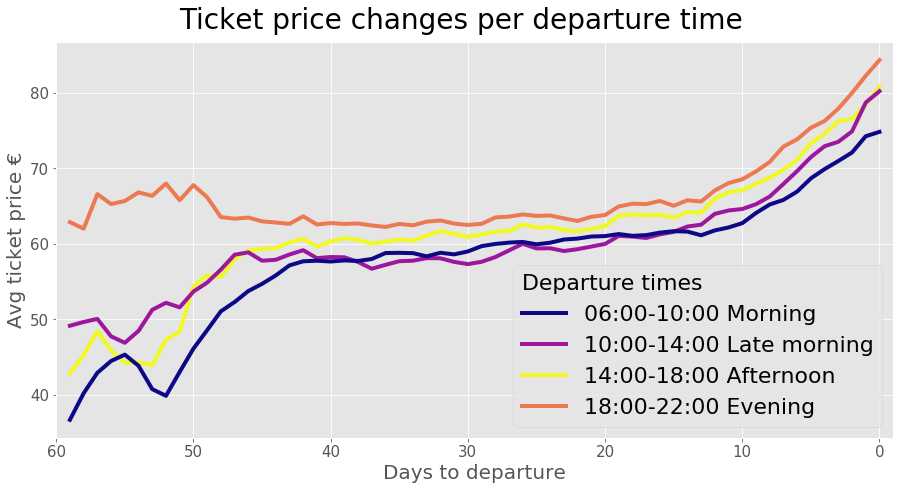

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
fig.subplots_adjust(hspace=0.24, top=0.91)
fig.suptitle("Ticket price changes per departure time", fontsize=28)

renfe.groupby(['days_to_departure','departure_time_window']).mean()['price'].unstack().plot(ax=ax, lw=4, cmap="plasma_r")
ax.set_xlim(60, -1)
ax.set_ylabel("Avg ticket price €", fontsize = 20)
ax.set_xlabel("Days to departure",fontsize = 20)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[3], handles[2], handles[0], handles[1]]
labels = [labels[3], labels[2], labels[0], labels[1]]

chg = ax.legend(handles,labels,loc="lower right", prop={'size': 22}, fancybox=True, title="Departure times",
          title_fontsize=22)

chg.get_texts()[0].set_text('06:00-10:00 Morning')
chg.get_texts()[1].set_text('10:00-14:00 Late morning')
chg.get_texts()[2].set_text('14:00-18:00 Afternoon')
chg.get_texts()[3].set_text('18:00-22:00 Evening')
chg._legend_box.align = "left"

plt.savefig("../Figures/Ticket price changes per departure time", dpi=300)

plt.show()


We were seeing before in the boxplots that indeed there was a slight difference in the price decomposing by departure time window, where we could see that evening departing trains observed less cheap prices that the ones in the rest of departing time windows, We were also venturing to say that it could be because evening departing trains have in general more demand than the rest, therefore, their prices that are set higher from Renfe, don't get to dip adjusting for a lower initial demand, as it happens with the rest.

This graph above backs this theory up. In fact, evening trains lowest price happens to be around a month before departing, resulting in a different optimal purchase moment.

### Class ticket effect

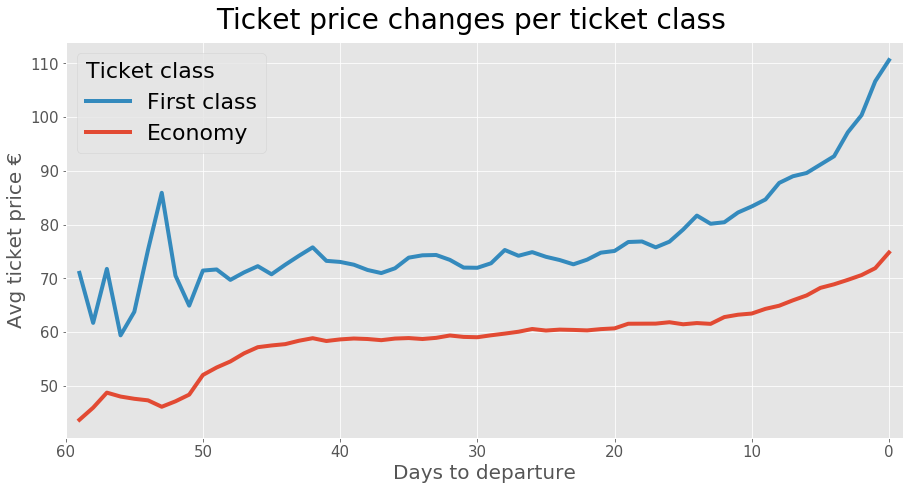

In [111]:
fig, ax = plt.subplots(figsize=(15,7))
fig.subplots_adjust(hspace=0.24, top=0.91)
fig.suptitle("Ticket price changes per ticket class", fontsize=28)

renfe.groupby(['days_to_departure','ticket_class_category']).mean()['price'].unstack().plot(ax=ax, lw=4)
ax.set_xlim(60, -1)
ax.set_ylabel("Avg ticket price €", fontsize = 20)
ax.set_xlabel("Days to departure",fontsize = 20)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]

chg = ax.legend(handles,labels,loc="upper left", prop={'size': 22}, fancybox=True, title="Ticket class",
          title_fontsize=22)

chg.get_texts()[0].set_text('First class')
chg.get_texts()[1].set_text('Economy')
chg._legend_box.align = "left"

plt.savefig("../Figures/Ticket price changes per fare category", dpi=300)

plt.show()


General already commented patterns hold for both types of tickets, so I would highlight that since we know that economy tickets sell out first, that explains why the rise in the prices when the departure date approaches ("last stage") is so smooth. On the contrary thus, first class are more demanded towards the last days before departure, and that is why the prices rise more strongly as compared to economy class tickets.

### Checking whether there are any pricing intraday differences

Once assessed price interday patterns, let's put the focus for a moment in intraday price evolution patterns, to see if perhaps they also exist.

In [25]:
intraday = renfe.groupby(['days_to_departure','price_check_time_window']).mean()['price'].to_frame()

In [51]:
intraday.head(7)

price
days_to_departure price_check_time_window           
0                 Afternoon                81.266651
                  Deep_night               80.575229
                  Evening                  70.428279
                  Late_morning             83.148743
                  Morning                  81.756669
                  Night                    79.647158
1                 Afternoon                79.163837

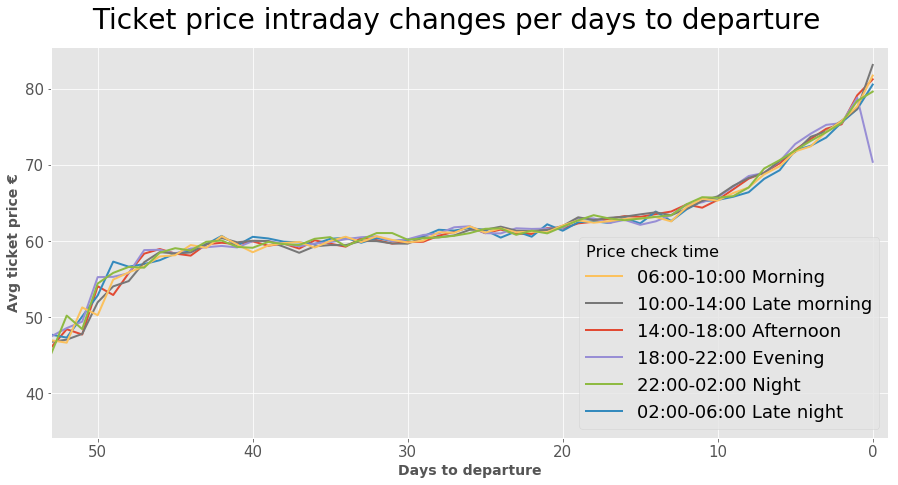

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
fig.subplots_adjust(hspace=0.24, top=0.90)
fig.suptitle("Ticket price intraday changes per days to departure", fontsize=28)
c1 = "#33EBB9"

renfe.groupby(['days_to_departure','price_check_time_window']).mean()['price'].unstack().plot(ax=ax, lw=2)
ax.set_xlim(53, -1)
ax.set_ylabel("Avg ticket price €", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Days to departure",fontsize = 14, fontweight = "bold")
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_xticks(np.arange(0, 53, step=10))

# Changing the order of the legends to make it naturally chronological

handles,labels = ax.get_legend_handles_labels()

handles = [handles[4], handles[3], handles[0], handles[2], handles[5], handles[1]]
labels = [labels[4], labels[3], labels[0], labels[2], labels[5], labels[1]]

chg = ax.legend(handles,labels,loc="lower right", prop={'size': 18}, fancybox=True, title="Price check time",
          title_fontsize=16)

# Changing the legends at display

chg.get_texts()[0].set_text('06:00-10:00 Morning')
chg.get_texts()[1].set_text('10:00-14:00 Late morning')
chg.get_texts()[2].set_text('14:00-18:00 Afternoon')
chg.get_texts()[3].set_text('18:00-22:00 Evening')
chg.get_texts()[4].set_text('22:00-02:00 Night')
chg.get_texts()[5].set_text('02:00-06:00 Late night')
chg._legend_box.align = "left"

plt.savefig("../Figures/train ticket price intraday changes per days to departure", dpi=300)
plt.show()

Lines continuously interweave and overlap in what it seems to tell that there are no differences in the intraday pricing per window times by days to departure. In particular, the only point that sticks out is the drop in evening prices towards the lower boundary of the graph (few to none days to departure). Zooming in, it is possible to see that the drop belongs to the same day of departure. 

So, in order to check whether we need to consider that drop relevant, we first need to know the amount of price checks runs that are done in general and how many are done per departure window time, in order to exclude potential dependency efects. 

In [52]:
cross_table = pd.crosstab(index=renfe.price_check_time_window, columns=renfe["departure_time_window"],
                          margins=True)

cross_table.index = ['Morning', 'Late morning', 'Afternoon', 'Evening', 'Night', 'Deep night',
                     'All price check windows']

cross_table.columns= ['Morning', 'Late morning', 'Afternoon', 'Evening', 'All departure windows']

In [53]:
cross_table

,Morning,Late morning,Afternoon,Evening,All departure windows
Morning,122556,92600,86927,121085,423168
Late morning,124492,92363,88288,122529,427672
Afternoon,121301,90344,86442,120485,418572
Evening,127285,95380,88960,123321,434946
Night,126343,94178,89231,122405,432157
Deep night,117972,87714,83838,116460,405984
All price check windows,739949,552579,523686,726285,2542499


In [61]:
pcg_cross_table = pd.crosstab(index=renfe.price_check_time_window, columns=renfe["departure_time_window"]) \
                .apply(lambda x: x/x.sum())

In [62]:
pcg_cross_table

departure_time_window,Afternoon,Evening,Late_morning,Morning
price_check_time_window,,,,
Afternoon,0.165628,0.167578,0.165991,0.166718
Deep_night,0.168244,0.167149,0.168590,0.168706
Evening,0.163932,0.163495,0.165065,0.165892
Late_morning,0.172019,0.172609,0.169873,0.169797
Morning,0.170746,0.170434,0.170390,0.168536
Night,0.159433,0.158736,0.160092,0.160350


We can see that the price checks are done round-the-clock pretty much at equal proportions. Let's see if this holds when zooming in for the last day, which is when the drop takes place.

In [93]:
renfe_reduced = renfe[renfe["days_to_departure"] < int("1")]

In [94]:
cross_table_reduced = pd.crosstab(index=renfe_reduced.price_check_time_window,
                    columns=renfe_reduced["departure_time_window"], margins=True)

cross_table_reduced = cross_table_reduced.transpose()

column_order = ['Morning', 'Late_morning', 'Afternoon', 'Evening', 'Night', 'Deep_night','All']

cross_table_reduced = cross_table_reduced[column_order]



In [95]:
cross_table_reduced = cross_table_reduced.transpose()

column_order = ['Morning', 'Late_morning', 'Afternoon', 'Evening', 'All']

cross_table_reduced = cross_table_reduced[column_order]


In [97]:
cross_table_reduced.index = ['Morning', 'Late morning', 'Afternoon', 'Evening', 'Night', 'Deep night',
                     'All price check windows']

cross_table_reduced.columns= ['Morning', 'Late morning', 'Afternoon', 'Evening', 'All departure windows']

In [98]:
cross_table_reduced

,Morning,Late morning,Afternoon,Evening,All departure windows
Morning,338,1870,2891,2143,7242
Late morning,0,267,2519,2253,5039
Afternoon,0,13,308,1740,2061
Evening,0,6,4,160,170
Night,1352,1023,1355,980,4710
Deep night,2343,2209,2919,2139,9610
All price check windows,4033,5388,9996,9415,28832


The proportionallity does not hold any longer. It means that for price checks done in the same day of departure, those price checks are done in an imbalanced way; in particular, we can see that the number of evening price checks is much lower than the ones done in other window times. 

So basically, since the difference is so high, the few trains whose price has been checked in the evening and in the same day of departure, might perfectly be of a particular type which on average are cheaper. In a nutshell, there are not relevant intraday price differences.

## Conclusions

We have found relevant price movements for the same combo train-day-time-route as the departure date approaches.

In particular, for high demand routes, the optimal moment to buy is between 50-60 days before departure. 
For non high demand routes, the optimal moment can be found between 40 to 50 days before departure. 
When train departures in the evening, the optimal moment is 30 days before departure.

In any case, if due to any reason the ticket cannot be purchased with as much time in advance, there is no need to worry since the price barely varies up until 12 days before departure (just 6-7% on average).

But, passed that threshold, tickets gets more expensive day by day as departure day approaches all the way to the day when the train departs.

Lastly, we have not found any intraday pattern in Renfe pricing system. So grouping by days to departure, one is indifferent to buy at any particular moment of the day.